In [33]:
import pandas as pd

features_df = pd.read_csv(r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\features_with_grid_position.csv")

features_info = features_df.info()

features_preview = features_df.head()

features_info, features_preview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25277 entries, 0 to 25276
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  25277 non-null  int64  
 1   Time                  25277 non-null  float64
 2   DriverName            25277 non-null  object 
 3   DriverNumber          25277 non-null  int64  
 4   LapTime               25277 non-null  float64
 5   LapNumber             25277 non-null  int64  
 6   Stint                 25277 non-null  int64  
 7   PitOutTime            25277 non-null  float64
 8   PitInTime             25277 non-null  float64
 9   Sector1Time           25277 non-null  float64
 10  Sector2Time           25277 non-null  float64
 11  Sector3Time           25277 non-null  float64
 12  Sector1SessionTime    25277 non-null  float64
 13  Sector2SessionTime    25277 non-null  float64
 14  Sector3SessionTime    25277 non-null  float64
 15  SpeedI1            

(None,
    Year     Time DriverName  DriverNumber   LapTime  LapNumber  Stint  \
 0  2024  0.00419        ALB            23  0.001340          1      1   
 1  2024  0.00538        ALB            23  0.001191          2      1   
 2  2024  0.00653        ALB            23  0.001157          3      1   
 3  2024  0.00653        ALB            23  0.001157          3      1   
 4  2024  0.00653        ALB            23  0.001157          3      1   
 
    PitOutTime  PitInTime  Sector1Time  ...  Rainfall  TrackTemp  \
 0         0.0        0.0     0.000000  ...       NaN        NaN   
 1         0.0        0.0     0.000357  ...       NaN        NaN   
 2         0.0        0.0     0.000346  ...       NaN        NaN   
 3         0.0        0.0     0.000346  ...       NaN        NaN   
 4         0.0        0.0     0.000346  ...       NaN        NaN   
 
    WindDirection  WindSpeed  TrackTempVariability  HumidityVariability  \
 0            NaN        NaN                   NaN            

In [37]:
import pandas as pd

data = pd.read_csv("C:/Users/admin/Desktop/Formula 1 Prediction Challenge 2024 Mexico Grand Prix/files with features/features_with_grid_position.csv")

data['TyreLife_GridPosition'] = data['TyreLife'] * data['GridPosition']
data['LapTime_StintLength'] = data['LapTime'] * data['StintLength']

data['CumulativeLapTime'] = data.groupby('DriverNumber')['LapTime'].cumsum()
data['CumulativeTyreLife'] = data.groupby('DriverNumber')['TyreLife'].cumsum()

avg_stints_per_driver = data.groupby('DriverNumber')['Stint'].mean().reset_index()
avg_stints_per_driver.columns = ['DriverNumber', 'AvgStintsPerDriver']
data = data.merge(avg_stints_per_driver, on='DriverNumber', how='left')

data['AvgAirTemp'] = data['AirTemp'].rolling(window=10).mean()  
data['MaxRainfall'] = data['Rainfall'].rolling(window=10).max()  

data['TotalPitStops'] = data.groupby('DriverNumber')['PitStopIndicator'].transform('sum')
data['AveragePitStopTime'] = data.groupby('DriverNumber')['PitInTime'].transform('mean')

data['TrackTempVariability'] = data['TrackTemp'].rolling(window=10).std()  
data['RainProportion'] = data['Rainfall'].apply(lambda x: 1 if x > 0 else 0) 

data['AvgSector1Time'] = data.groupby('DriverNumber')['Sector1Time'].transform('mean')
data['AvgSector2Time'] = data.groupby('DriverNumber')['Sector2Time'].transform('mean')
data['AvgSector3Time'] = data.groupby('DriverNumber')['Sector3Time'].transform('mean')

data['Speed_FL'] = data['SpeedFL'].fillna(0) 
data['Throttle'] = data['Throttle'].fillna(0)  

data.to_csv("C:/Users/admin/Desktop/Formula 1 Prediction Challenge 2024 Mexico Grand Prix/files with features/features_with_new_features.csv", index=False)

print("New features created and dataset saved.")


New features created and dataset saved.


In [38]:
import pandas as pd

features_df = pd.read_csv(r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\features_with_new_features.csv")

features_info = features_df.info()

features_preview = features_df.head()

features_info, features_preview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25277 entries, 0 to 25276
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25277 non-null  int64  
 1   Time                   25277 non-null  float64
 2   DriverName             25277 non-null  object 
 3   DriverNumber           25277 non-null  int64  
 4   LapTime                25277 non-null  float64
 5   LapNumber              25277 non-null  int64  
 6   Stint                  25277 non-null  int64  
 7   PitOutTime             25277 non-null  float64
 8   PitInTime              25277 non-null  float64
 9   Sector1Time            25277 non-null  float64
 10  Sector2Time            25277 non-null  float64
 11  Sector3Time            25277 non-null  float64
 12  Sector1SessionTime     25277 non-null  float64
 13  Sector2SessionTime     25277 non-null  float64
 14  Sector3SessionTime     25277 non-null  float64
 15  Sp

(None,
    Year     Time DriverName  DriverNumber   LapTime  LapNumber  Stint  \
 0  2024  0.00419        ALB            23  0.001340          1      1   
 1  2024  0.00538        ALB            23  0.001191          2      1   
 2  2024  0.00653        ALB            23  0.001157          3      1   
 3  2024  0.00653        ALB            23  0.001157          3      1   
 4  2024  0.00653        ALB            23  0.001157          3      1   
 
    PitOutTime  PitInTime  Sector1Time  ...  LapTime_StintLength  \
 0         0.0        0.0     0.000000  ...             0.335032   
 1         0.0        0.0     0.000357  ...             0.297772   
 2         0.0        0.0     0.000346  ...             0.289199   
 3         0.0        0.0     0.000346  ...             0.289199   
 4         0.0        0.0     0.000346  ...             0.289199   
 
    CumulativeLapTime  CumulativeTyreLife  AvgStintsPerDriver  TotalPitStops  \
 0           0.001340                   1            2.09

Number of Stints: How accurately the model predicts the number of stints for a given driver.


C:\Users\admin\AppData\Local\Temp\ipykernel_18900\856010499.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([float('inf'), -float('inf')], pd.NA, inplace=True)


Mean Squared Error: 0.004807258702531645
R-squared: 0.9932528045047553


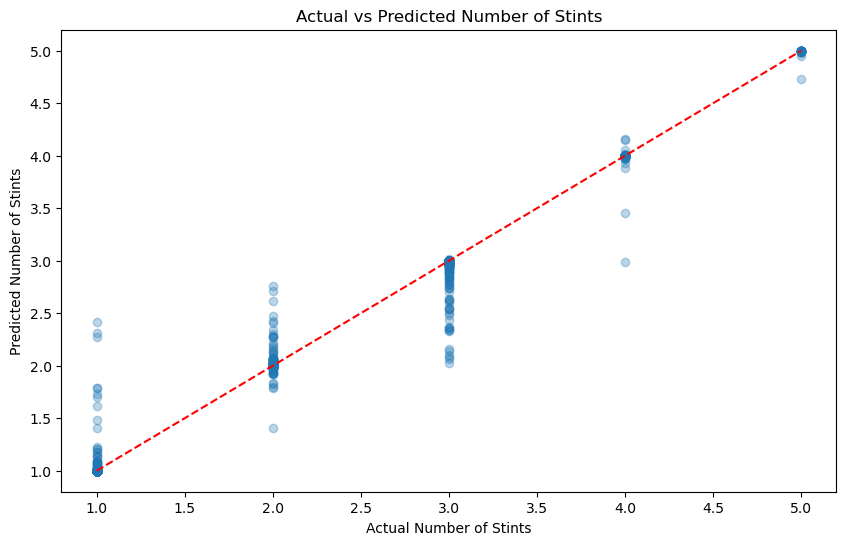

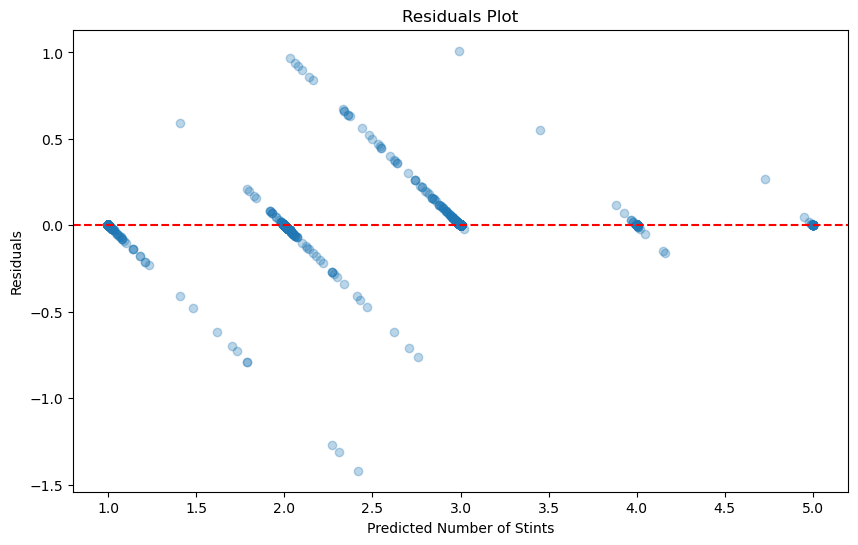

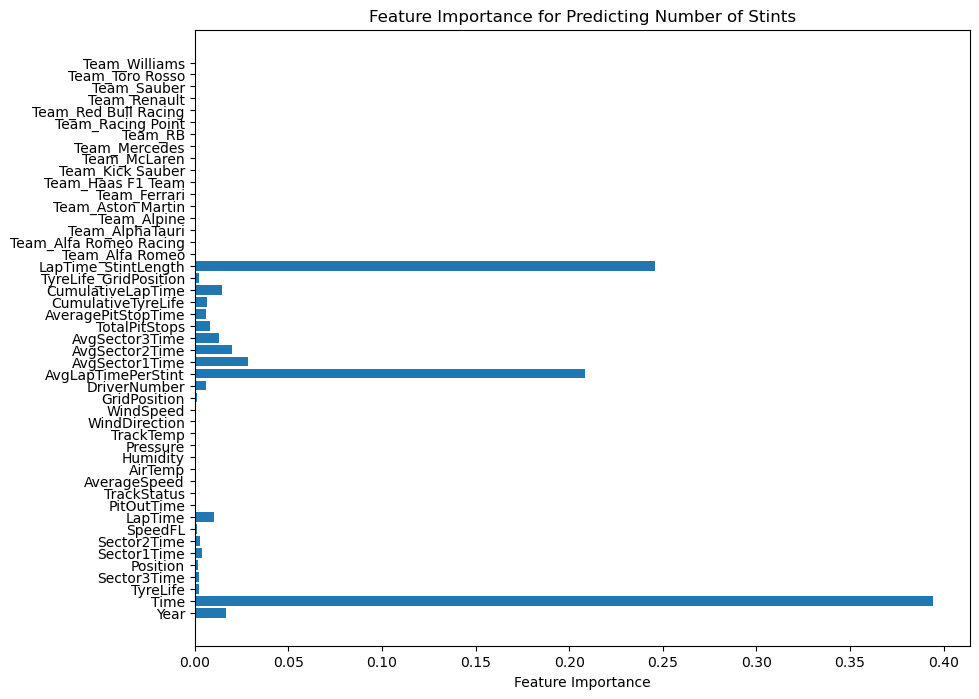

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib  
import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users/admin/Desktop/Formula 1 Prediction Challenge 2024 Mexico Grand Prix/files with features/features_with_new_features.csv")

X = data[['Year', 'Time', 'TyreLife', 'Sector3Time', 'Position', 
           'Sector1Time', 'Sector2Time', 'SpeedFL', 'FreshTyre', 
           'LapTime', 'PitOutTime', 'TrackStatus', 'AverageSpeed', 
           'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 
           'WindDirection', 'WindSpeed', 'GridPosition', 
           'DriverNumber', 'IsPersonalBest', 'Team',
           'AvgLapTimePerStint', 'AvgSector1Time', 'AvgSector2Time', 
           'AvgSector3Time', 'TotalPitStops', 'AveragePitStopTime', 
           'CumulativeTyreLife', 'CumulativeLapTime', 
           'TyreLife_GridPosition', 'LapTime_StintLength']]
y = data['Stint']  

X.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

joblib.dump(model, "C:/Users/admin/Desktop/Formula 1 Prediction Challenge 2024 Mexico Grand Prix/files with features/stint_prediction_model.pkl")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Number of Stints')
plt.ylabel('Predicted Number of Stints')
plt.title('Actual vs Predicted Number of Stints')
plt.savefig('C:/Users/admin/Desktop/Formula 1 Prediction Challenge 2024 Mexico Grand Prix/files with features/stints_actual_vs_predicted.png')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Number of Stints')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.savefig('C:/Users/admin/Desktop/Formula 1 Prediction Challenge 2024 Mexico Grand Prix/files with features/stints_residual_plot.png')
plt.show()

rf = model.named_steps['regressor']
feature_importances = rf.feature_importances_

features = numeric_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))

plt.figure(figsize=(10, 8))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Predicting Number of Stints')
plt.savefig('C:/Users/admin/Desktop/Formula 1 Prediction Challenge 2024 Mexico Grand Prix/files with features/feature_importance_stints.png')
plt.show()


Tire Compound Prediction: Predicting the tire compounds used in each stint.


C:\Users\admin\AppData\Local\Temp\ipykernel_18900\320080676.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([float('inf'), -float('inf')], pd.NA, inplace=True)


Accuracy: 0.982001582278481
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2347
           1       1.00      1.00      1.00        26
           2       1.00      0.97      0.98       260
           3       0.99      0.97      0.98      1774
           4       0.98      0.95      0.96       426
           5       1.00      1.00      1.00       167
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00         4

    accuracy                           0.98      5056
   macro avg       0.99      0.99      0.99      5056
weighted avg       0.98      0.98      0.98      5056

[[2333    0    0   11    3    0    0    0]
 [   0   26    0    0    0    0    0    0]
 [   6    0  252    2    0    0    0    0]
 [  41    0    1 1728    4    0    0    0]
 [  10    0    0   13  403    0    0    0]
 [   0    0    0    0    0  167    0    0]
 [   0    0    0    0    0    0   52    0]
 [   0    0    0    

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


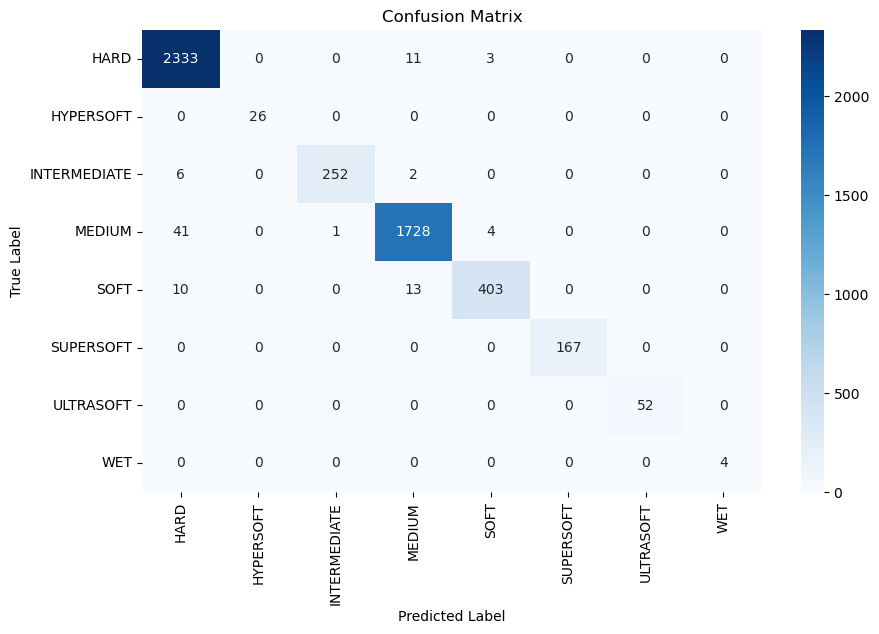

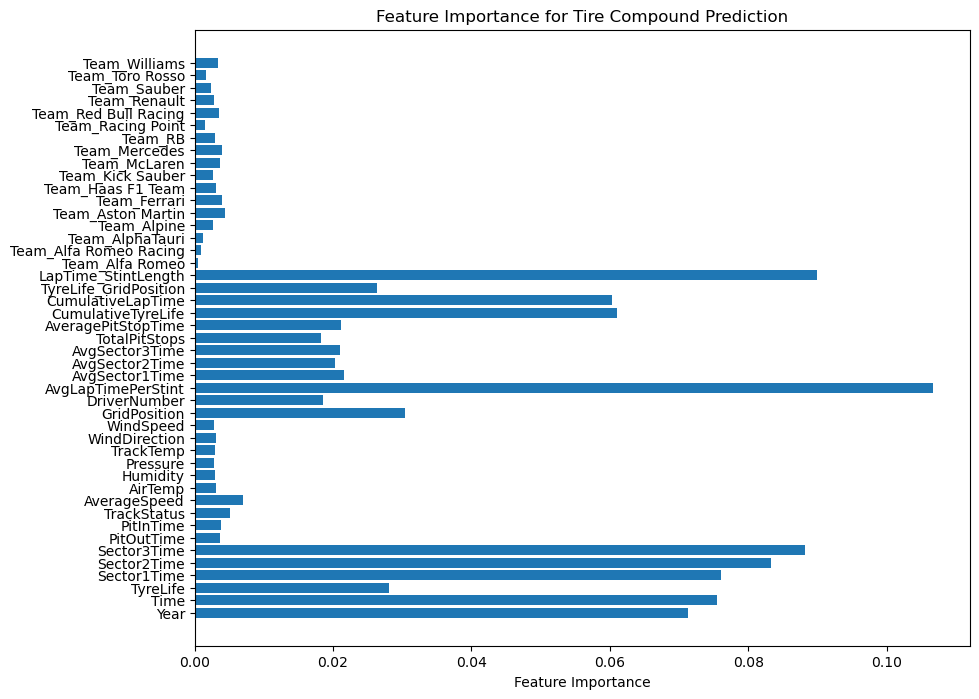

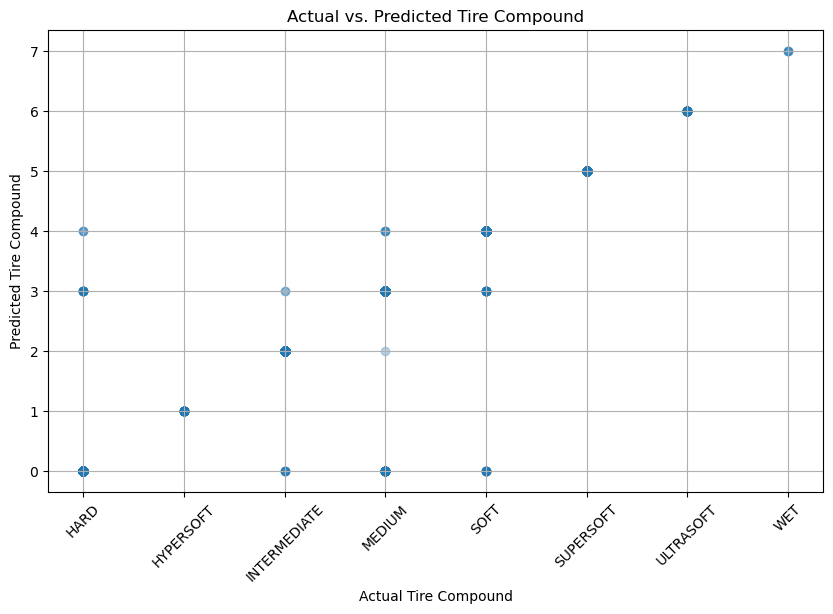

['tire_compound_prediction_model.pkl']

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error

data = pd.read_csv("C:/Users/admin/Desktop/Formula 1 Prediction Challenge 2024 Mexico Grand Prix/files with features/features_with_new_features.csv")

X = data[['Year', 'Time', 'TyreLife', 'Sector1Time', 'Sector2Time', 'Sector3Time', 
           'PitOutTime', 'PitInTime', 'TrackStatus', 'AverageSpeed', 
           'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 
           'WindDirection', 'WindSpeed', 'GridPosition', 'DriverNumber', 
           'IsPersonalBest', 'Team', 'AvgLapTimePerStint', 
           'AvgSector1Time', 'AvgSector2Time', 'AvgSector3Time', 
           'TotalPitStops', 'AveragePitStopTime', 'CumulativeTyreLife', 
           'CumulativeLapTime', 'TyreLife_GridPosition', 'LapTime_StintLength']]

y = data['Compound']  

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
confusion_matrix_result = confusion_matrix(y_test, y_pred)
print(confusion_matrix_result)


mse = mean_squared_error(y_test, y_pred, squared=False)  
print(f'Mean Squared Error (RMSE): {mse}')


plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix_tire_compound.png')
plt.show()

rf = model.named_steps['classifier']
feature_importances = rf.feature_importances_

features = numeric_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))

plt.figure(figsize=(10, 8))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Tire Compound Prediction')
plt.savefig('feature_importance_tire_compound.png')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.title('Actual vs. Predicted Tire Compound')
plt.xlabel('Actual Tire Compound')
plt.ylabel('Predicted Tire Compound')
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.grid()
plt.savefig('actual_vs_predicted_tire_compound.png')
plt.show()

joblib.dump(model, 'tire_compound_prediction_model.pkl')


Laps per Stint: Predicting the number of laps within each stint.

In [4]:
import pandas as pd

file_path = r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\features_with_new_features.csv"
data = pd.read_csv(file_path)

print(data.head())

data['AvgLapTimePerStint'] = data.groupby(['DriverNumber', 'Stint'])['LapTime'].transform('mean')  
data['LapCount'] = data.groupby(['DriverNumber', 'Stint'])['LapNumber'].transform('count')  
data['CumulativeLapCount'] = data.groupby(['DriverNumber'])['LapCount'].cumsum()  
data['LapTimeStdDev'] = data.groupby(['DriverNumber', 'Stint'])['LapTime'].transform('std')  
data['PitStopDuration'] = data['PitOutTime'] + data['PitInTime']  
data['SpeedAvg'] = (data['Sector1Time'] + data['Sector2Time'] + data['Sector3Time']) / 3  
data['RainIndicator'] = (data['TrackStatus'] == 'Wet').astype(int)  
data['TyreWearRate'] = data['TyreLife'] / data['LapCount']  
data['LapTimeProgression'] = data['LapTime'].diff().fillna(0)  


updated_file_path = r"C:\Users\admin\Desktop\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\files with features\features_with_enhanced_features.csv"
data.to_csv(updated_file_path, index=False)

print("New features created and dataset saved.")


   Year     Time DriverName  DriverNumber   LapTime  LapNumber  Stint  \
0  2024  0.00419        ALB            23  0.001340          1      1   
1  2024  0.00538        ALB            23  0.001191          2      1   
2  2024  0.00653        ALB            23  0.001157          3      1   
3  2024  0.00653        ALB            23  0.001157          3      1   
4  2024  0.00653        ALB            23  0.001157          3      1   

   PitOutTime  PitInTime  Sector1Time  ...  LapTime_StintLength  \
0         0.0        0.0     0.000000  ...             0.335032   
1         0.0        0.0     0.000357  ...             0.297772   
2         0.0        0.0     0.000346  ...             0.289199   
3         0.0        0.0     0.000346  ...             0.289199   
4         0.0        0.0     0.000346  ...             0.289199   

   CumulativeLapTime  CumulativeTyreLife  AvgStintsPerDriver  TotalPitStops  \
0           0.001340                   1            2.093124             75   


Mean Squared Error (MSE): 87.73341702927216
Root Mean Squared Error (RMSE): 9.366611822279824
R-squared: 0.995973660004227


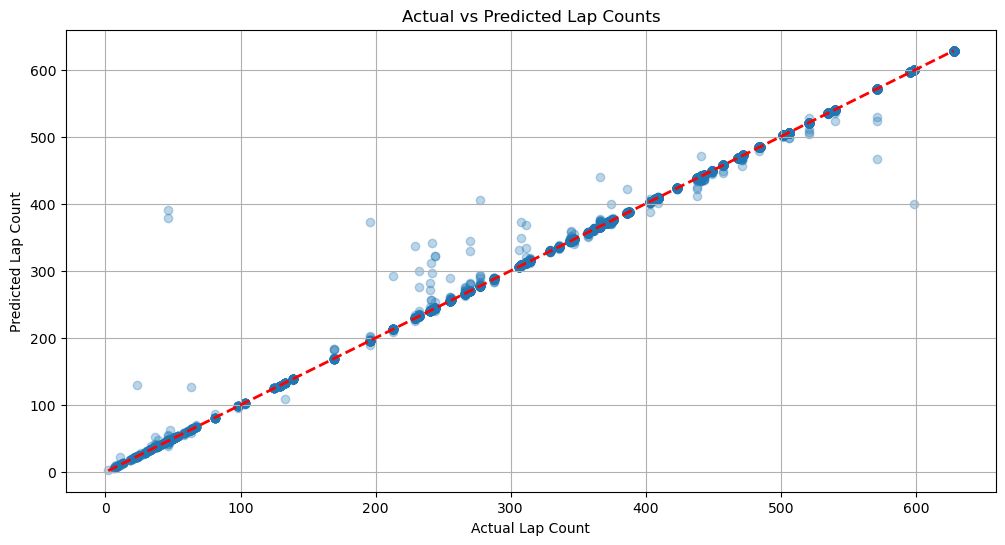

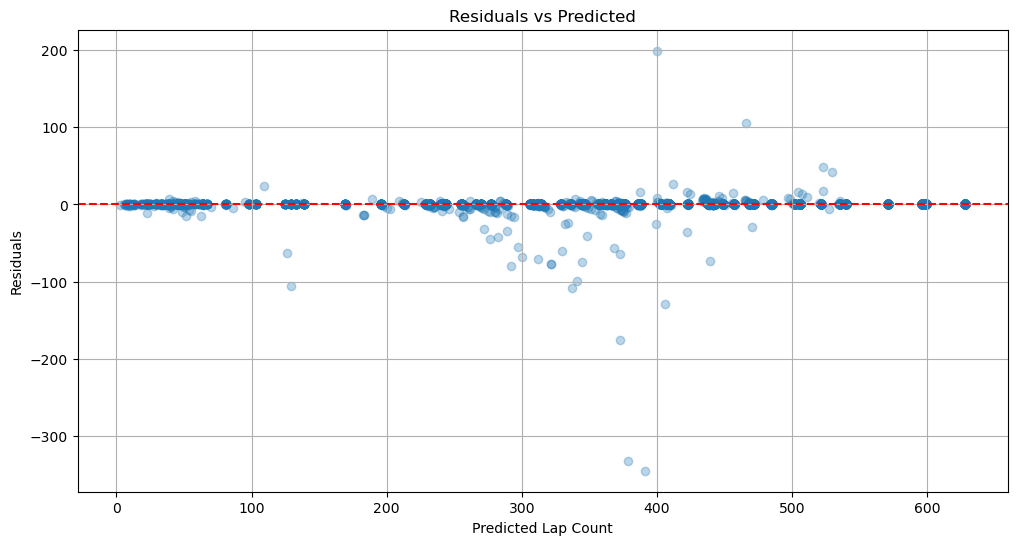

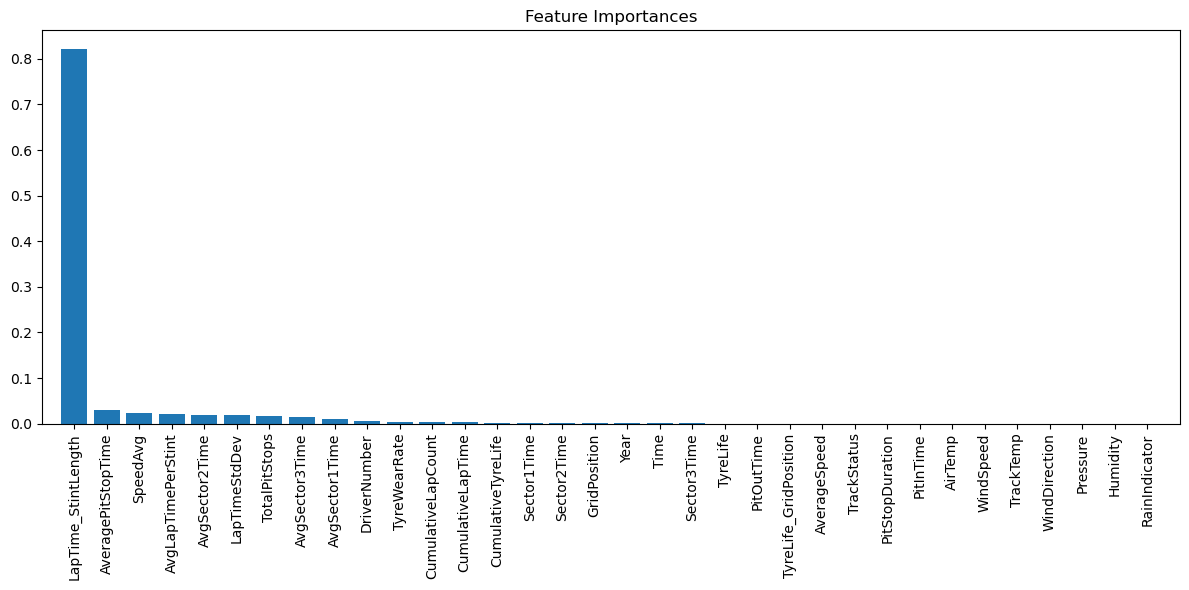

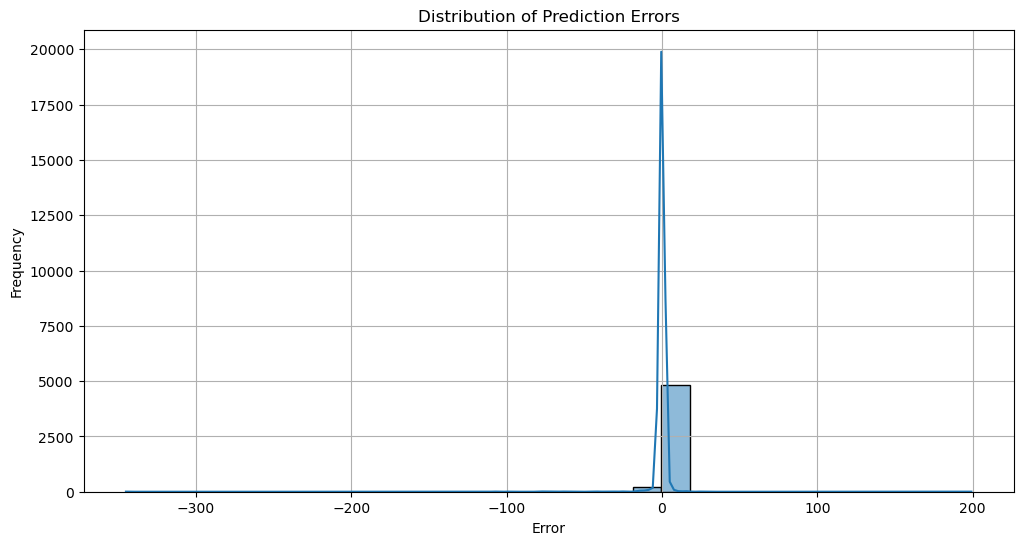

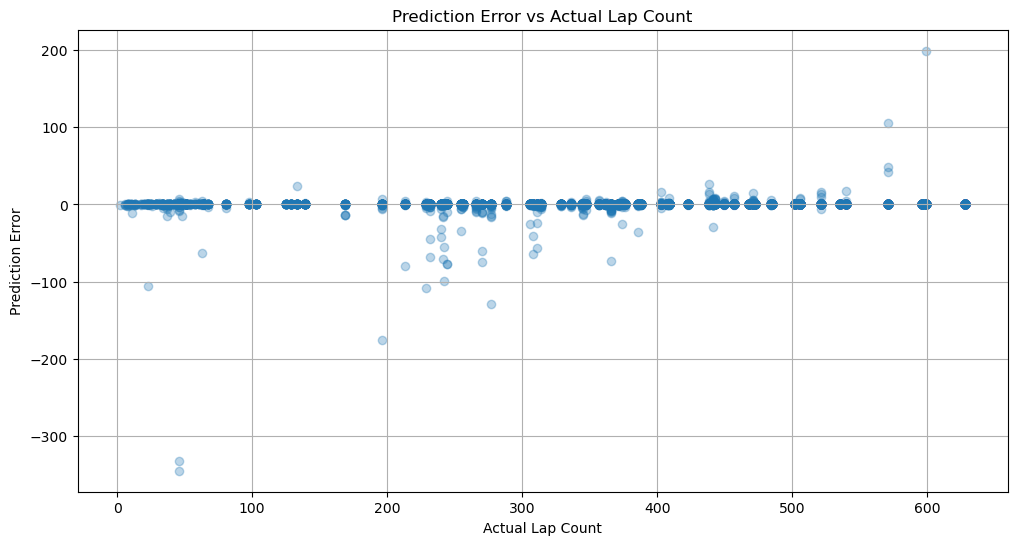

['C:\\Users\\admin\\Desktop\\lap_count_prediction_model.pkl']

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

data = pd.read_csv("C:\\Users\\admin\\Desktop\\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\\files with features\\features_with_enhanced_features.csv")

X = data[['Year', 'Time', 'TyreLife', 'Sector1Time', 'Sector2Time', 
           'Sector3Time', 'PitOutTime', 'PitInTime', 'TrackStatus', 
           'AverageSpeed', 'AirTemp', 'Humidity', 'Pressure', 
           'TrackTemp', 'WindDirection', 'WindSpeed', 'GridPosition', 
           'DriverNumber', 'AvgLapTimePerStint', 'AvgSector1Time', 
           'AvgSector2Time', 'AvgSector3Time', 'TotalPitStops', 
           'AveragePitStopTime', 'CumulativeTyreLife', 'CumulativeLapTime', 
           'TyreLife_GridPosition', 'LapTime_StintLength', 
           'CumulativeLapCount', 'LapTimeStdDev', 
           'PitStopDuration', 'SpeedAvg', 'RainIndicator', 'TyreWearRate']]
y = data['LapCount']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.title('Actual vs Predicted Lap Counts')
plt.xlabel('Actual Lap Count')
plt.ylabel('Predicted Lap Count')
plt.grid()
plt.savefig("C:\\Users\\admin\\Desktop\\actual_vs_predicted_lap_counts.png")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Lap Count')
plt.ylabel('Residuals')
plt.grid()
plt.savefig("C:\\Users\\admin\\Desktop\\residuals_vs_predicted_lap_counts.png")
plt.show()

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.savefig("C:\\Users\\admin\\Desktop\\feature_importance_lap_counts.png")
plt.show()

errors = y_test - y_pred
plt.figure(figsize=(12, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid()
plt.savefig("C:\\Users\\admin\\Desktop\\error_distribution_lap_counts.png")
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(y_test, errors, alpha=0.3)
plt.title('Prediction Error vs Actual Lap Count')
plt.xlabel('Actual Lap Count')
plt.ylabel('Prediction Error')
plt.grid()
plt.savefig("C:\\Users\\admin\\Desktop\\error_vs_actual_lap_counts.png")
plt.show()

joblib.dump(model, "C:\\Users\\admin\\Desktop\\lap_count_prediction_model.pkl")


Average Lap Time per Stint:

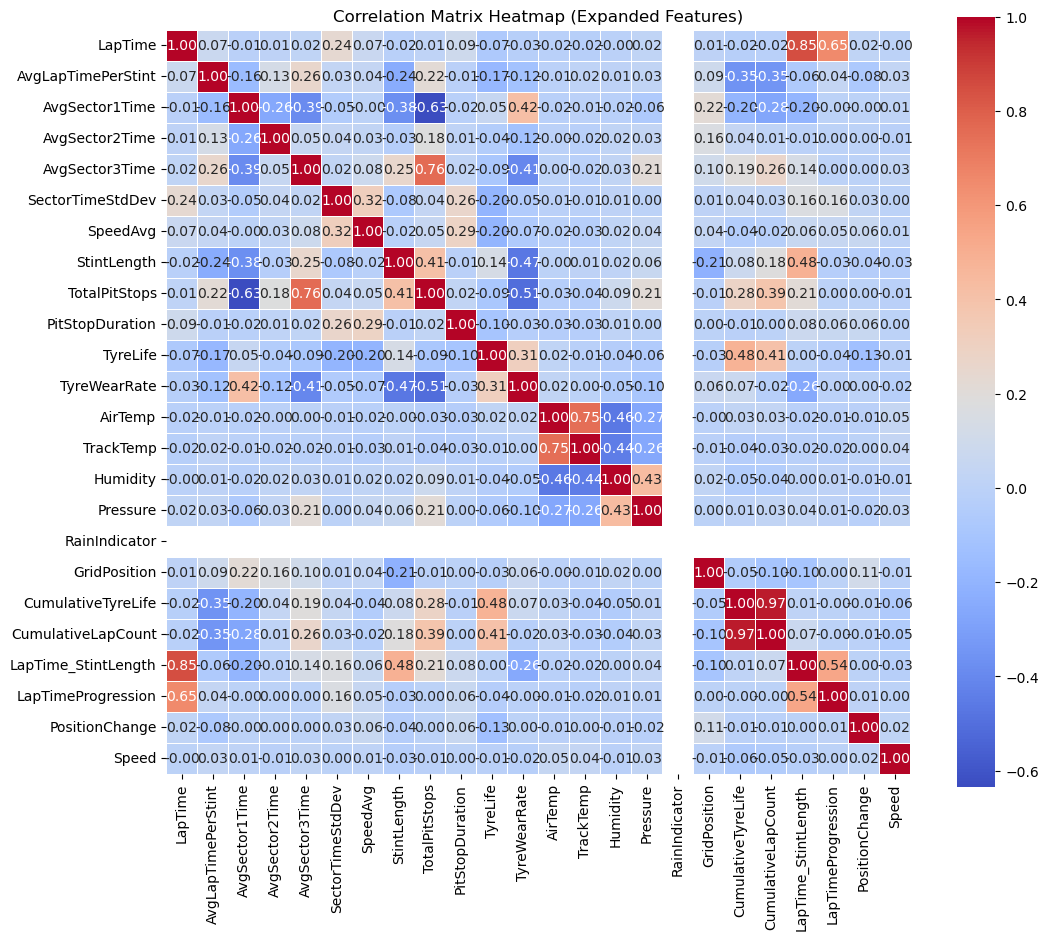

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("C:\\Users\\admin\\Desktop\\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\\files with features\\features_with_enhanced_features.csv")

relevant_features = [
    'LapTime', 
    'AvgLapTimePerStint', 
    'AvgSector1Time', 
    'AvgSector2Time', 
    'AvgSector3Time', 
    'SectorTimeStdDev', 
    'SpeedAvg', 
    'StintLength', 
    'TotalPitStops', 
    'PitStopDuration', 
    'TyreLife', 
    'TyreWearRate', 
    'AirTemp', 
    'TrackTemp', 
    'Humidity', 
    'Pressure', 
    'RainIndicator', 
    'GridPosition',
    'CumulativeTyreLife',
    'CumulativeLapCount',
    'LapTime_StintLength',
    'LapTimeProgression',
    'PositionChange',
    'Speed'
]

relevant_data = data[relevant_features]

correlation_matrix = relevant_data.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=.5)

plt.title('Correlation Matrix Heatmap (Expanded Features)')
plt.savefig('correlation_matrix_heatmap_expanded_features.png')
plt.show()


Mean Squared Error (MSE): 1.1113567838301556e-12
R-squared: 0.9996193556349876


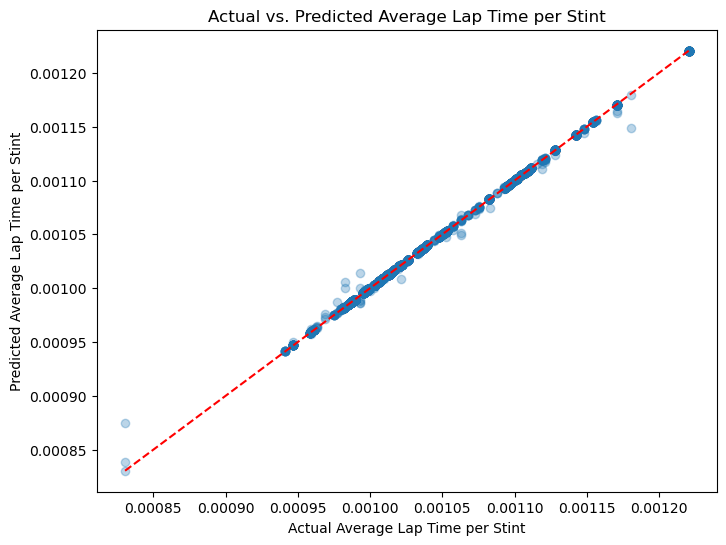

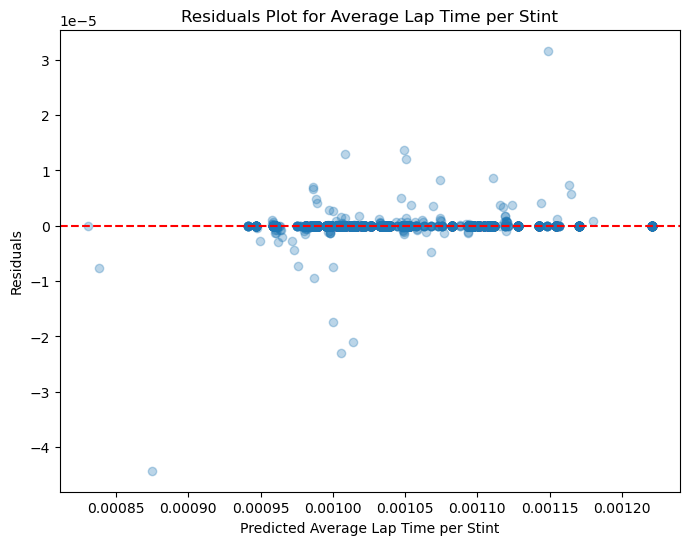

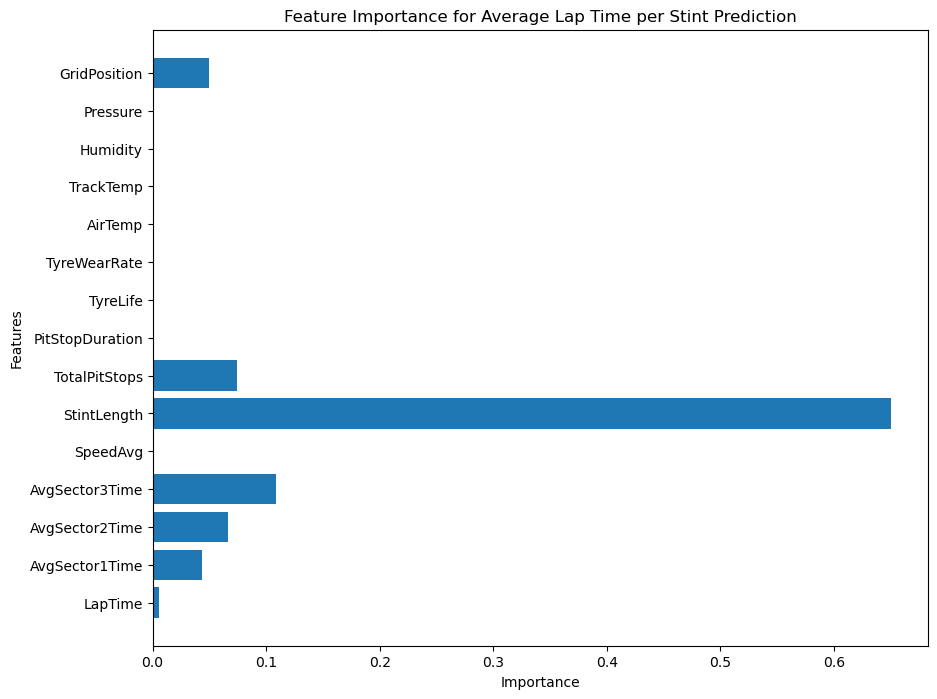

['C:\\Users\\admin\\Desktop\\Averag_La_Time_per_Stint_model.pkl']

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("C:\\Users\\admin\\Desktop\\Formula 1 Prediction Challenge 2024 Mexico Grand Prix\\files with features\\features_with_enhanced_features.csv")

X = data[['LapTime', 'AvgSector1Time', 'AvgSector2Time', 
           'AvgSector3Time', 'SpeedAvg', 'StintLength', 'TotalPitStops', 
           'PitStopDuration', 'TyreLife', 'TyreWearRate', 'AirTemp', 
           'TrackTemp', 'Humidity', 'Pressure', 'GridPosition']]
y = data['AvgLapTimePerStint']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Average Lap Time per Stint')
plt.ylabel('Predicted Average Lap Time per Stint')
plt.title('Actual vs. Predicted Average Lap Time per Stint')
plt.savefig('actual_vs_predicted_avg_lap_time_per_stint.png')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Average Lap Time per Stint')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Average Lap Time per Stint')
plt.savefig('residuals_avg_lap_time_per_stint.png')
plt.show()

rf = model.named_steps['regressor']
feature_importances = rf.feature_importances_

plt.figure(figsize=(10, 8))
plt.barh(numeric_features, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Average Lap Time per Stint Prediction')
plt.savefig('feature_importance_avg_lap_time_per_stint.png')
plt.show()

joblib.dump(model, "C:\\Users\\admin\\Desktop\\Averag_La_Time_per_Stint_model.pkl")




Model Usage Instructions for EvaluatorsInput Structure
The model accepts a CSV file with the following structure:

Columns must include: Year, DriverName, GridPosition, AirTemp, TrackTemp, RainIndicator, and other relevant features.


Model Execution
Load the model using Python's pickle library. Use the .predict() method to obtain predictions by passing in the input data.

In [ ]:
import pandas as pd
import pickle

with open('path_to_model.pkl', 'rb') as file:
    model = pickle.load(file)

input_data = pd.read_csv('path_to_input_data.csv')

predictions = model.predict(input_data)

print(predictions)
